In [280]:
'''
Description:

This project utilizes a forest fire data set for predicted values using a linear regression.
I started by visualizing the data, dropping columns, and making adjustments to 
columns to try to fit the data better.  Then, I scaled all of the numeric values
to be between 0 and 1 in order for the model to read them easier.
Afterward, I began training the model.  My adjustments led to an extremely low RMSE and MAE.
I do not believe that these values accurately represent the predicitons of the dataset,
and am currently working to improve the values.

Dataset link: https://archive.ics.uci.edu/dataset/162/forest+fires
'''

'\nName:  Tucker Davis\nCPSC 480 Mini Project 1- Regression Model\n\nProject Description\n\nThis project utilizes a forest fire data set for predicted values using a linear regression.\nI started by visualizing the data, dropping columns, and making adjustments to \ncolumns to try to fit the data better.  Then, I scaled all of the numeric values\nto be between 0 and 1 in order for the model to read them easier.\nAfterward, I began training the model.  My adjustments led to an extremely low RMSE and MAE.\nI do not believe that these values accurately represent the predicitons of the dataset,\nbut I was unable to get different values using different models and/or folds of the dataset.\n\n\n'

In [282]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [284]:
import pandas as pd

def load_data():
    return pd.read_csv("forestfires.csv")

In [286]:
fire = load_data()
fire.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [288]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [290]:
fire.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


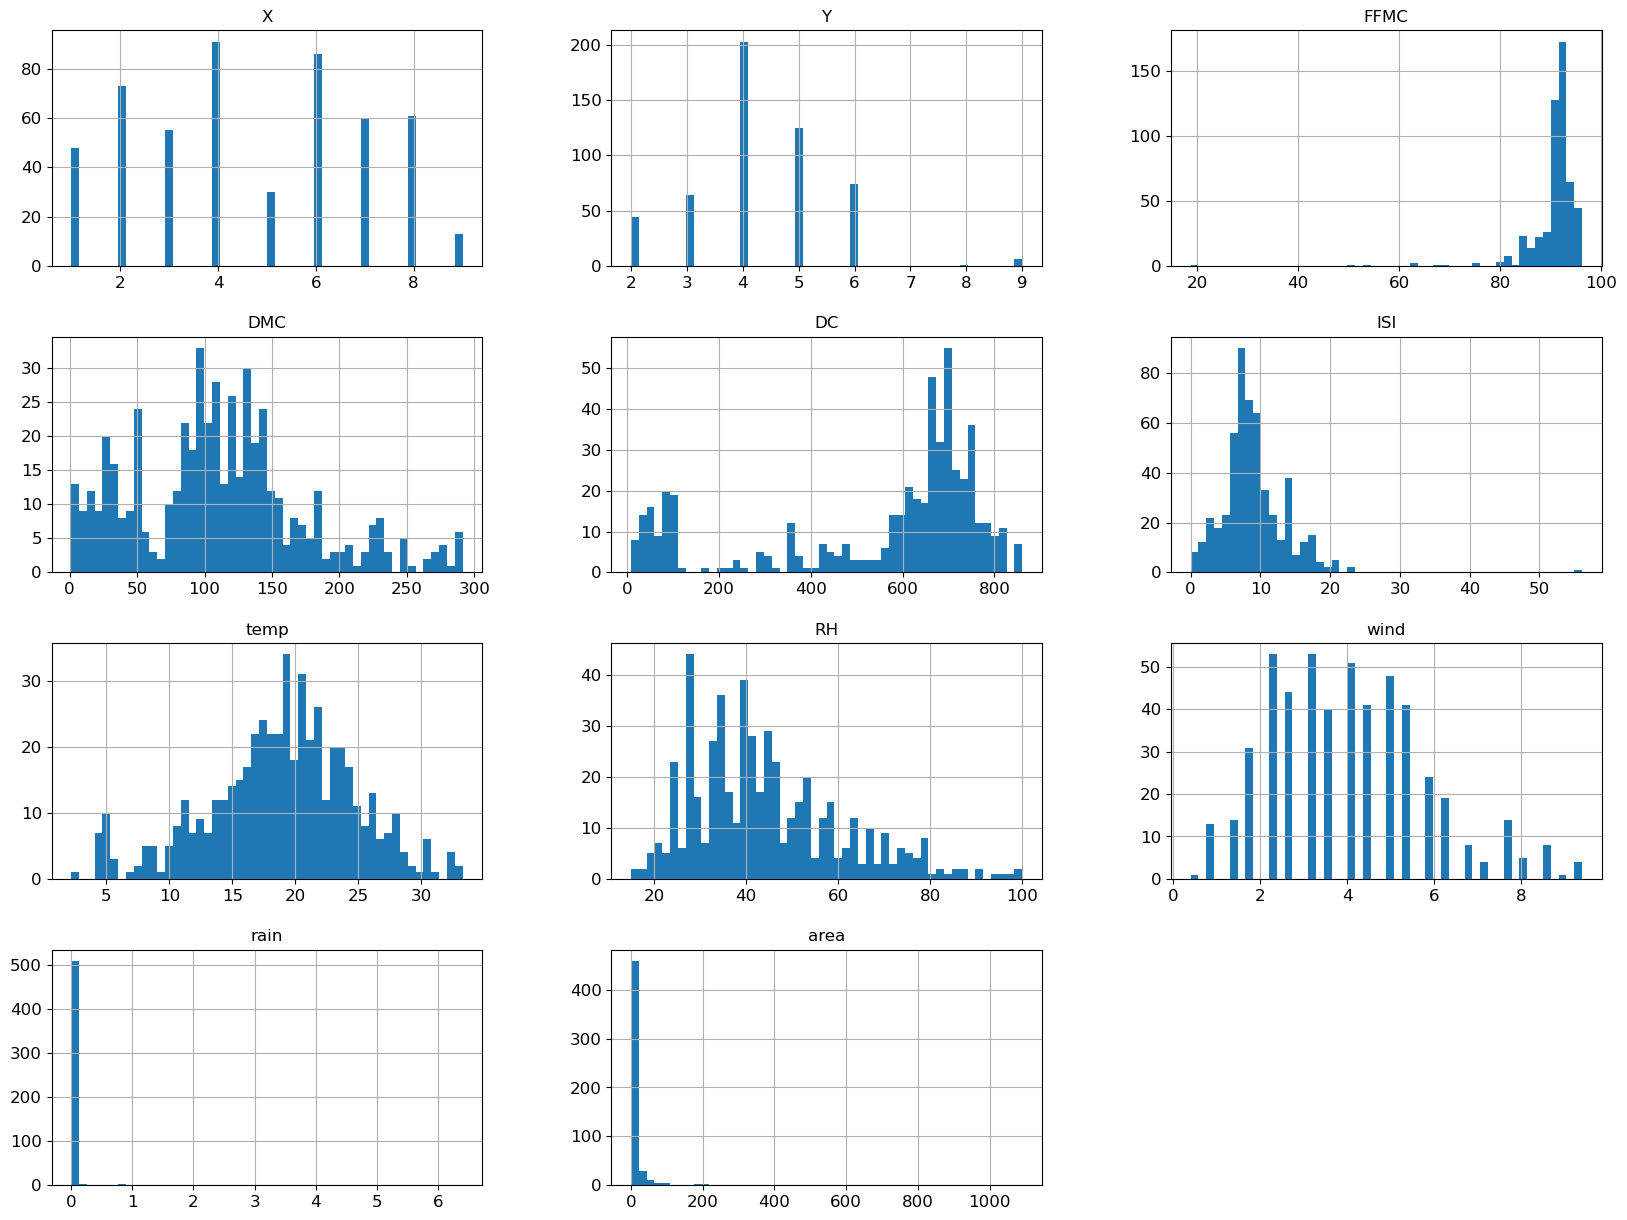

In [292]:
%matplotlib inline
import matplotlib.pyplot as plt
fire.hist(bins=50, figsize=(20,15))
plt.show()

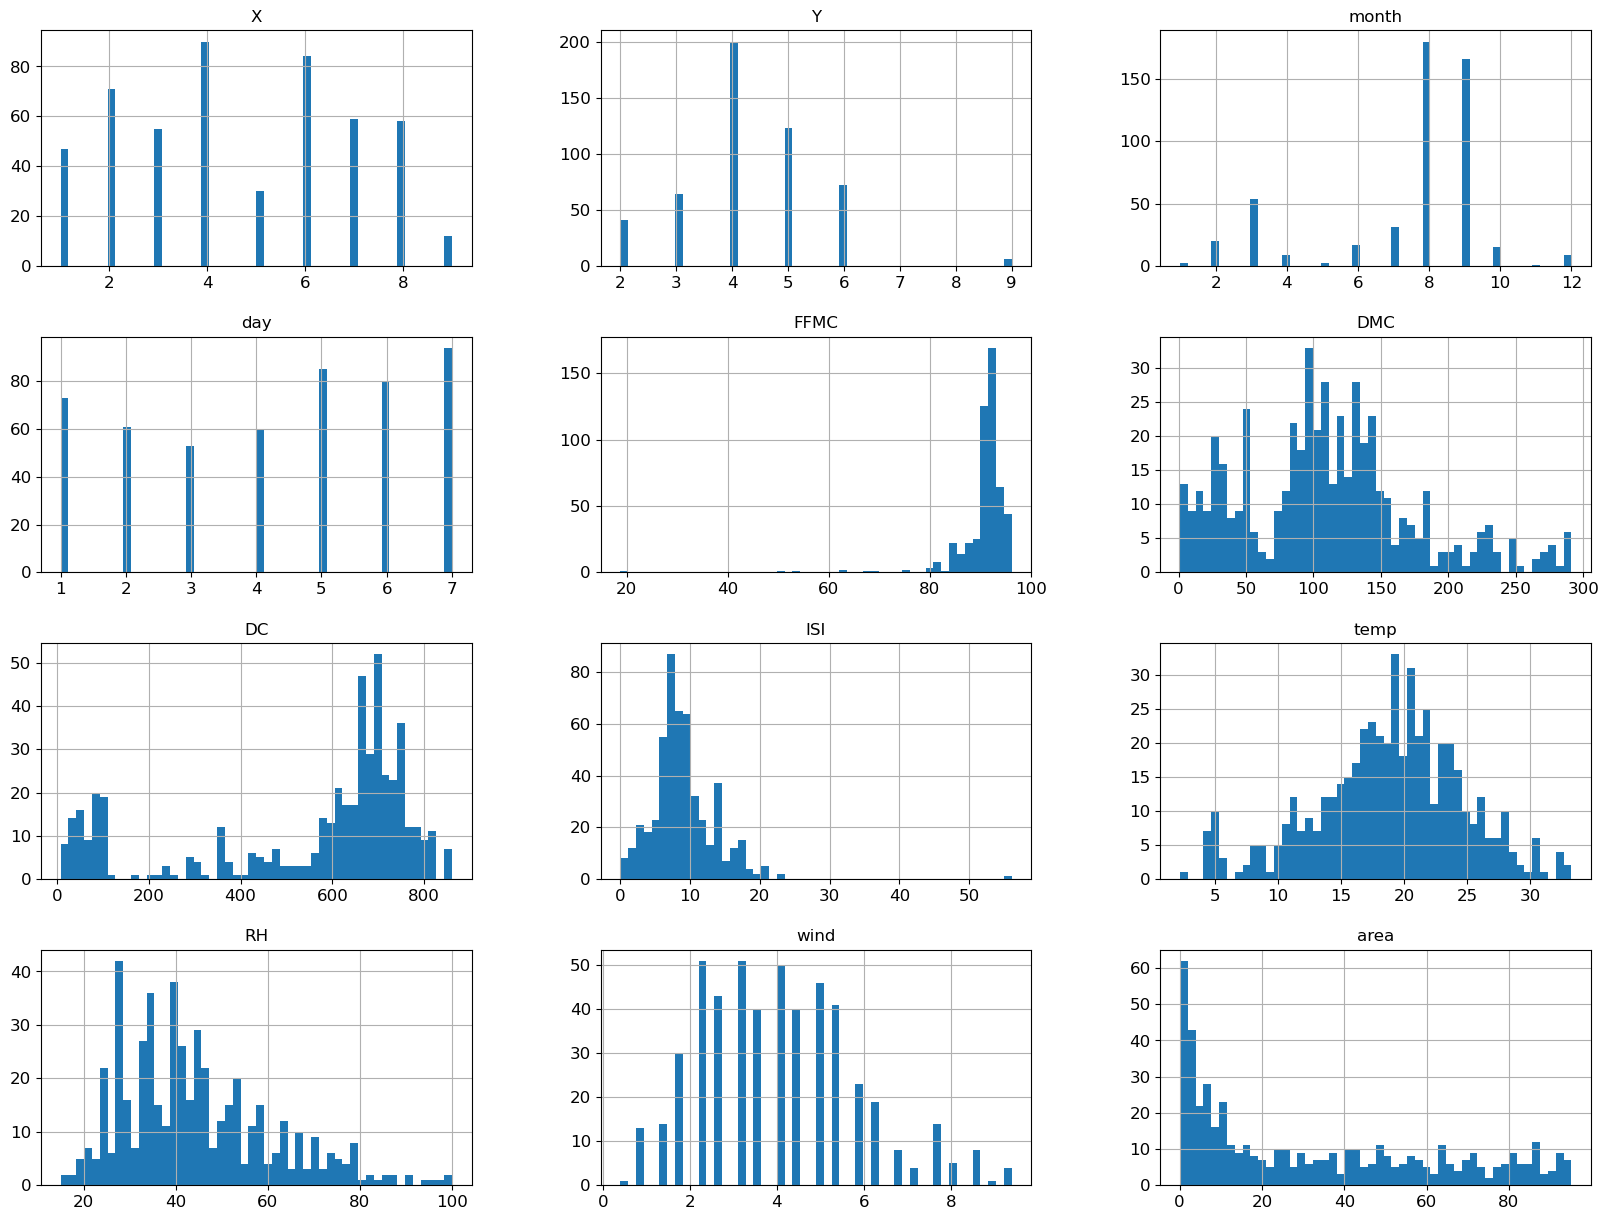

In [293]:
import random
#Adjusting the area column to drop outliers and 0 values
condition = fire['area'] > 100
fire = fire[~condition]

max_area = fire['area'].max()  # Use a different variable name
fire['area'] = fire['area'].apply(lambda x: random.uniform(10, max_area) if x == 0 else x)

#Mapping the month and day to numeric values
month_mapping = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

day_mapping = {
    'mon': 1,
    'tue': 2,
    'wed': 3,
    'thu': 4,
    'fri': 5,
    'sat': 6,
    'sun': 7
}

fire['month'] = fire['month'].map(month_mapping)
fire['day'] = fire['day'].map(day_mapping)

#Dropping the rain column, since its values are skewed
if 'rain' in fire.columns:
    fire.drop('rain', axis=1, inplace=True)

fire.hist(bins=50, figsize=(20,15))
plt.show()

In [294]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [295]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [296]:
fire_with_id = fire.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(fire_with_id, 0.2, "index")

In [297]:
fire["temp_cat"] = pd.cut(fire["temp"],
                               bins=[0., 7, 14, 21, 28, np.inf],
                               labels=[1, 2, 3, 4, 5])

<Axes: >

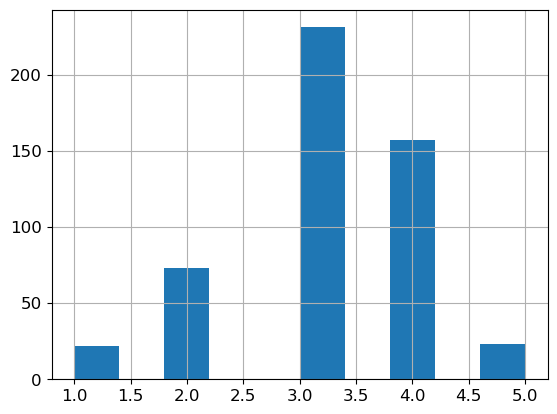

In [298]:
fire["temp_cat"].hist()

In [299]:
from sklearn.model_selection import StratifiedShuffleSplit

fire.reset_index(drop=True, inplace=True)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(fire, fire["temp_cat"]):
    strat_train_set = fire.loc[train_index]
    strat_test_set = fire.loc[test_index]

In [300]:
strat_test_set["temp_cat"].value_counts() / len(strat_test_set)

temp_cat
3    0.450980
4    0.313725
2    0.147059
5    0.049020
1    0.039216
Name: count, dtype: float64

In [301]:
for set_ in (strat_train_set, strat_test_set):
    if "temp_cat" in set_.columns:
        set_.drop("temp_cat", axis=1, inplace=True)

<Axes: xlabel='temp', ylabel='RH'>

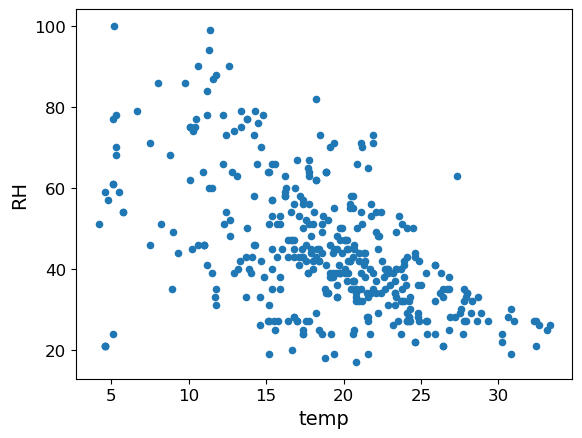

In [302]:
fire = strat_train_set.copy()
fire.plot(kind="scatter", x="temp", y="RH")

In [303]:
corr_matrix = fire.corr()
corr_matrix["temp"].sort_values(ascending=False)

temp     1.000000
DC       0.480304
DMC      0.468863
FFMC     0.437479
ISI      0.406995
month    0.358767
day      0.055620
area    -0.032123
Y       -0.064406
X       -0.073016
wind    -0.210673
RH      -0.536438
Name: temp, dtype: float64

In [305]:
fire_labels = strat_train_set["temp"].copy()

In [306]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#For training set
scaled_fire = scaler.fit_transform(strat_train_set)
scaled_fire = pd.DataFrame(scaled_fire, columns=strat_train_set.columns)


#For testing set
scaled_fire_test = scaler.fit_transform(strat_test_set)
scaled_fire_test = pd.DataFrame(scaled_fire_test, columns = strat_test_set.columns)



In [307]:
scaled_fire.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,area
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.459468,0.324965,0.585284,0.556931,0.926745,0.376387,0.629764,0.161844,0.503930,0.332190,0.406491,0.342303
std,0.283743,0.173802,0.208481,0.346997,0.076288,0.222202,0.293801,0.085391,0.201043,0.196893,0.202844,0.309755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.285714,0.545455,0.166667,0.922581,0.206323,0.487891,0.115865,0.384880,0.192771,0.255556,0.059494
50%,0.375000,0.285714,0.636364,0.666667,0.940645,0.369400,0.766565,0.149733,0.515464,0.301205,0.400000,0.255184
75%,0.750000,0.428571,0.727273,0.833333,0.957419,0.486906,0.828427,0.196078,0.636598,0.445783,0.555556,0.593084
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [308]:
scaled_fire_test.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,area
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.443627,0.341737,0.551961,0.491830,0.845182,0.370395,0.634785,0.414480,0.588060,0.351506,0.353518,0.362273
std,0.303460,0.171943,0.230681,0.336108,0.119520,0.220453,0.297075,0.190789,0.206559,0.204499,0.199821,0.334752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.156250,0.285714,0.600000,0.166667,0.824387,0.189941,0.519783,0.282051,0.486607,0.195122,0.211765,0.056622
50%,0.375000,0.285714,0.600000,0.500000,0.865031,0.366109,0.770528,0.389744,0.610714,0.317073,0.364706,0.244219
75%,0.718750,0.428571,0.700000,0.833333,0.898773,0.479603,0.822548,0.492308,0.735714,0.463415,0.470588,0.615912
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [309]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(scaled_fire, fire_labels)

LinearRegression()

In [310]:
some_data = scaled_fire.iloc[:5]
some_labels = fire_labels.iloc[:5]
print("Predictions:", lin_reg.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [13.8 15.9 23.3 23.7 23.4]
Labels: [13.8, 15.9, 23.3, 23.7, 23.4]


In [311]:
from sklearn.metrics import mean_squared_error
fire_predictions = lin_reg.predict(scaled_fire)
lin_mse = mean_squared_error(fire_labels, fire_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

7.2378866414918e-15

In [312]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(fire_labels, fire_predictions)
mae

5.691816654959466e-15

In [313]:
lin_scores = cross_val_score(lin_reg, fire, fire_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


In [314]:
display_scores(lin_rmse_scores)

Scores: [7.84295289e-15 1.23957538e-14 5.53048404e-14 4.92100581e-14
 3.66950460e-14 7.17310620e-15 1.22128570e-14 8.11238072e-15
 1.64929974e-14 4.02603058e-14]
Mean: 2.4570029823083734e-14
Standard deviation: 1.7788799261129508e-14
